In [1]:
import pandas as pd
from dotenv import load_dotenv
from openai import OpenAI
from anthropic import Anthropic
from src.consts import *

load_dotenv(override=True)
openai = OpenAI()
anthropic = Anthropic() 

In [2]:
import importlib
import src.oracle
importlib.reload(src.oracle)
from src.oracle import generate_oracle_csv

# Regenerate the oracle CSV with improved color category handling
generate_oracle_csv('example_oracle.txt', '../../AllPrintingsCSVFiles/cards.csv', 'output/oracle_output.csv')

Oracle CSV generated: output/oracle_output.csv


In [3]:
# Load the data files
oracle_df = pd.read_csv('output/oracle_output.csv')
legacy_oracle_df = pd.read_csv('ThePauperCube_oracle_with_pt.csv')
print(f"Loaded {len(oracle_df)} cards from oracle_df")
print(f"Columns available: {list(oracle_df.columns)}")
oracle_df.head()

Loaded 450 cards from oracle_df
Columns available: ['name', 'CMC', 'Type', 'Color', 'Color Category', 'Oracle Text', 'tags', 'MTGO ID', 'Power', 'Toughness']


,name,CMC,Type,Color,Color Category,Oracle Text,tags,MTGO ID,Power,Toughness
0,Boros Elite,1,Creature — Human Soldier,W,White,Battalion — Whenever this creature and at leas...,NaN,NaN,1.0,1.0
1,Deftblade Elite,1,Creature — Human Soldier,W,White,"Provoke (Whenever this creature attacks, you m...",NaN,NaN,1.0,1.0
2,Doomed Traveler,1,Creature — Human Soldier,W,White,"When this creature dies, create a 1/1 white Sp...",NaN,NaN,1.0,1.0
3,Elite Vanguard,1,Creature — Human Soldier,W,White,NaN,NaN,NaN,2.0,1.0
4,Faerie Guidemother,1,Creature — Faerie,W,White,Flying,NaN,NaN,1.0,1.0


# Theme Validation
Let's check if we have enough cards available for each theme in our jumpstart cube.

# Deck Construction
Now let's test the deck construction function to build actual jumpstart decks from our themes.

In [4]:
# Test the refactored deck construction function

# Build all jumpstart decks using the new refactored version
from src.construct import construct_jumpstart_decks, print_detailed_deck_analysis, CardConstraints, analyze_deck_composition

# Create constraints with custom target deck size and non-land limits
constraints = CardConstraints(
    target_deck_size=13,
    max_lands_dual=1,
    max_lands_mono=1,
    total_non_land=12,  # All 12 cards should be non-lands
    min_creatures=2,  # Set minimum to 4 for testing
    max_creatures=9
)

print("🚀 Starting deck construction with refactored algorithm...")
deck_dataframes = construct_jumpstart_decks(oracle_df, constraints=constraints)

# Generate analysis first, then print detailed analysis
analysis = analyze_deck_composition(deck_dataframes)
print_detailed_deck_analysis(deck_dataframes, analysis, constraints)

🚀 Starting deck construction with refactored algorithm...
🏗️ CONSTRUCTING JUMPSTART DECKS

🔒 Phase 0: Core card reservation
Ensuring each theme gets its defining cards before general competition...

🎯 White Soldiers: Reserving core cards
  ✅ Boros Elite               |   5.3 pts | Creature — Human Sol...
  ✅ Miner's Guidewing         |   5.3 pts | Creature — Bird
  ✅ Topan Freeblade           |   4.8 pts | Creature — Human Sol...
  ✅ Ainok Bond-Kin            |   4.3 pts | Creature — Dog Soldi...
  📦 Reserved 4 core cards

🎯 White Equipment: Reserving core cards
  ✅ Ancestral Blade           |  11.8 pts | Artifact — Equipment
  ✅ Vulshok Morningstar       |  11.8 pts | Artifact — Equipment
  ✅ Mandibular Kite           |  11.2 pts | Artifact — Equipment
  ✅ Greatsword of Tyr         |  11.2 pts | Artifact — Equipment
  ✅ Flayer Husk               |  11.2 pts | Artifact — Equipment
  📦 Reserved 5 core cards

🎯 White Angels: Reserving core cards
  ✅ Combat Professor          |   6.8 pts 

In [5]:
from src.export import export_cube_to_csv


export_cube_to_csv(deck_dataframes, 'jumpstart_decks.csv', oracle_df)

Exporting jumpstart cube to jumpstart_decks.csv...
Adding 60 unassigned cards...
✅ Successfully exported 450 cards to jumpstart_decks.csv

📊 Export Summary:
Total cards: 450
Assigned cards: 390
Unassigned cards: 60
Number of decks: 30

Deck breakdown:
  Green Elves: 13 cards
  Simic Ramp Control: 13 cards
  Boros Aggro: 13 cards
  Golgari Graveyard Value: 13 cards
  Izzet Spells Matter: 13 cards
  Orzhov Lifegain Value: 13 cards
  Selesnya Value: 13 cards
  Gruul Midrange: 13 cards
  Rakdos Aggro: 13 cards
  Dimir Mill: 13 cards
  Unassigned: 60 cards
  ... and 20 more decks


'jumpstart_decks.csv'

In [6]:
# Import validation functions and run card uniqueness validation
from src.validation import validate_card_uniqueness, validate_deck_constraints, validate_jumpstart_cube, display_validation_summary

# Run the validation
# validation_result = validate_card_uniqueness(deck_dataframes)
validate_jumpstart_cube(deck_dataframes, oracle_df, ALL_THEMES, constraints)

🎯 COMPREHENSIVE JUMPSTART CUBE VALIDATION
🔍 VALIDATING CARD UNIQUENESS
📊 VALIDATION RESULTS:
Total cards across all decks: 390
Unique cards used: 390
Duplicate cards found: 0

✅ VALIDATION PASSED!
All 390 cards are used exactly once.
🔍 VALIDATING DECK CONSTRAINTS
📊 CONSTRAINT VALIDATION RESULTS:
Valid decks: 30/30
Constraint violations: 0

✅ ALL CONSTRAINTS SATISFIED!

📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  63/ 70 cards ( 90.0%)
  Blue     :  62/ 67 cards ( 92.5%)
  Black    :  57/ 67 cards ( 85.1%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  60/ 67 cards ( 89.6%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 10
Unused lands: 23
Unused spells: 27

Sample unused cards:
  • Alabaster Host Intercessor (Creature — Phyrexian Samurai) - W
  • Borrowed Gra

{'overall_valid': True,
 'uniqueness': {'valid': True,
  'total_cards': 390,
  'unique_cards': 390,
  'duplicates': {},
  'duplicate_count': 0,
  'extra_instances': 0},
 'constraints': {'valid': True,
  'valid_decks': 30,
  'total_decks': 30,
  'violations': []},
 'distribution': {'total_available': 450,
  'total_used': 390,
  'unused_count': 60,
  'usage_rate': 0.8666666666666667,
  'color_stats': {'W': {'used': 63, 'available': 70, 'rate': 90.0},
   'U': {'used': 62, 'available': 67, 'rate': 92.53731343283582},
   'B': {'used': 57, 'available': 67, 'rate': 85.07462686567165},
   'R': {'used': 62, 'available': 67, 'rate': 92.53731343283582},
   'G': {'used': 60, 'available': 67, 'rate': 89.55223880597015},
   'C': {'used': 51, 'available': 74, 'rate': 68.91891891891892}},
  'complete_decks': 30,
  'incomplete_decks': []}}

In [7]:
# Additional analysis using the imported validation functions
from src.validation import analyze_card_distribution

# Run the distribution analysis
distribution_analysis = analyze_card_distribution(deck_dataframes, oracle_df, constraints)


📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  63/ 70 cards ( 90.0%)
  Blue     :  62/ 67 cards ( 92.5%)
  Black    :  57/ 67 cards ( 85.1%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  60/ 67 cards ( 89.6%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 10
Unused lands: 23
Unused spells: 27

Sample unused cards:
  • Alabaster Host Intercessor (Creature — Phyrexian Samurai) - W
  • Borrowed Grace (Instant) - W
  • Settle Beyond Reality (Sorcery) - W
  • Oblivion Ring (Enchantment) - W
  • Faith's Fetters (Enchantment — Aura) - W
  • Sword Coast Serpent (Creature — Serpent Dragon) - U
  • Bubble Snare (Enchantment — Aura) - U
  • Unable to Scream (Enchantment — Aura) - U
  • Weakstone's Subjugation (Enchantment — Aura) - U
  • Witness Protection (Enchantment 

In [8]:
# Compute metrics for all decks\n
from src.balance import compute_all_deck_metrics
metrics_df = compute_all_deck_metrics(deck_dataframes, ALL_THEMES)
metrics_df.set_index('theme', inplace=True)
metrics_df.head()


,avg_cmc,type_creature,type_—,type_human,type_soldier,type_bird,type_dog,type_kithkin,type_soltari,type_instant,...,type_spider,type_thrull,type_imp,type_nomad,type_arcane,type_hag,type_leech,type_mutant,type_cartouche,type_turtle
theme,,,,,,,,,,,,,,,,,,,,,
White Soldiers,1.153846,0.230769,0.230769,0.128205,0.205128,0.025641,0.025641,0.025641,0.025641,0.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Equipment,2.000000,0.159091,0.272727,0.090909,0.090909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Angels,3.846154,0.225000,0.250000,0.025000,0.025000,0.050000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Weenies,1.384615,0.186047,0.255814,0.116279,0.046512,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue Flying,2.692308,0.236842,0.263158,NaN,NaN,0.105263,NaN,NaN,NaN,0.078947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


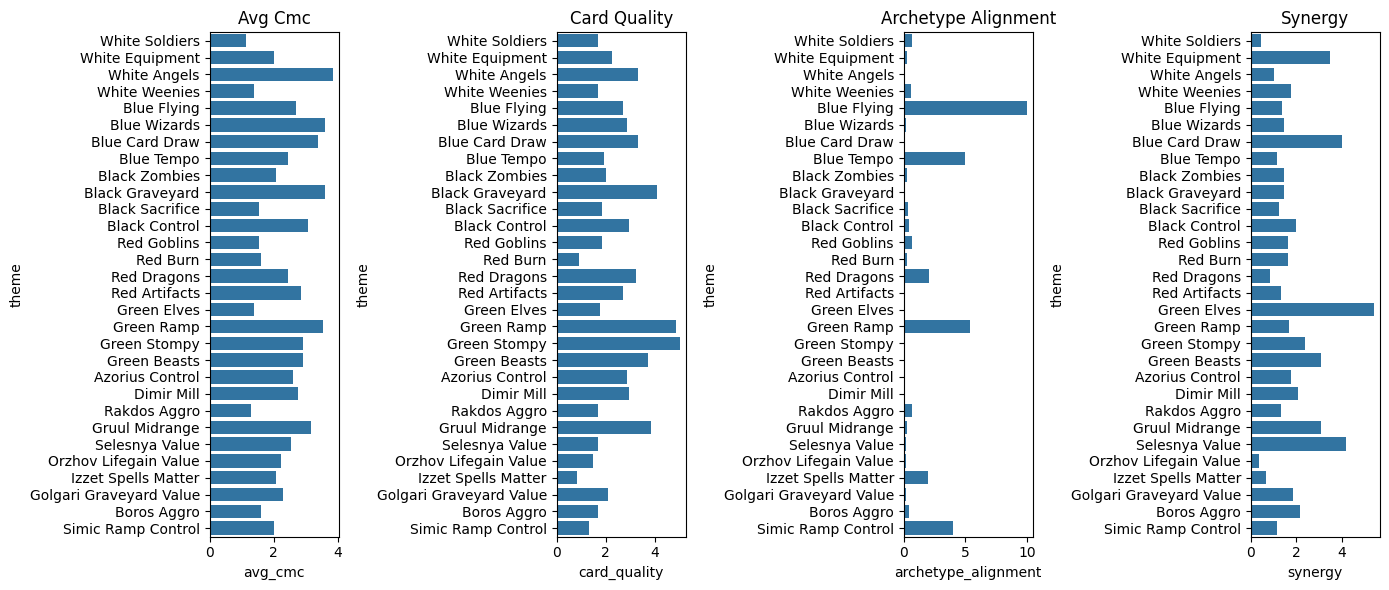

In [9]:
# Bar plots for key metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy']):
    plt.subplot(1, 4, i+1)
    sns.barplot(y=metrics_df.index, x=metrics_df[metric], orient='h')
    plt.title(metric.replace('_', ' ').title())
    plt.tight_layout()
plt.show()

In [14]:
# Import plotly for interactive visualizations
import plotly.graph_objects as go

In [16]:
sample_themes = metrics_df.index[:]  # Show first 5 decks as example
radar_metrics = ['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy', 'keyword_density']
fig = go.Figure()
for theme in sample_themes:
    values = metrics_df.loc[theme, radar_metrics].values.tolist()
    fig.add_trace(go.Scatterpolar(
        r=values + [values[0]],
        theta=radar_metrics + [radar_metrics[0]],
        fill='toself',
        name=theme
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Deck Balance Radar Chart (Sample)'
)
fig.show()